# Estadística Aplicada
Sesión 19 - 18 de octubre   

David Eduardo Gómez Marín - 1914352 - Gpo 41


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [8]:
#Tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)

In [9]:
igae_sa = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [10]:
igae_sa

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451
...,...,...
362,2023/03,102.032776
363,2023/04,102.735045
364,2023/05,102.924688
365,2023/06,103.438087


In [11]:
#1 Formato de fecha
igae_sa['meses'] = pd.to_datetime(igae_sa['meses'], format='%Y/%m')

In [12]:
#Hacerlo  index
igae_sa = igae_sa.set_index('meses')

In [13]:
igae_sa.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq=None)

In [14]:
#Asignar funcion mensual
igae_sa = igae_sa.asfreq('MS')

In [15]:
igae_sa.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

###
ARIMA (Series sin efecto estacional)
SARIMA (Series con componente estacional)

Text(0, 0.5, 'índice')

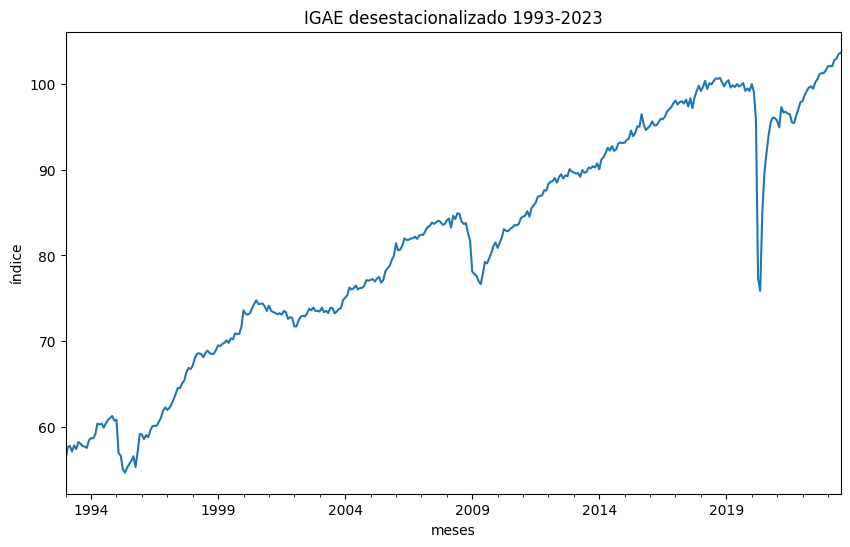

In [16]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('índice')

In [17]:
#Prueba de Dickey-Fuller Aumentada
#Ho: Serie no estacionario
#Ha: Serie estacionaria
df_test = adfuller(igae_sa['IGAE_DESES'])
pvalue = df_test[1]
pvalue

0.7352896929912629

In [18]:
#No rechazamos H0, significa que la serie es no estacionaria
#Hay que hacerla estaionaria aplicando primeras diferencias

igae_sa['igae_diff'] = igae_sa['IGAE_DESES'].diff()

In [19]:
igae_sa

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929
...,...,...
2023-03-01,102.032776,-0.011138
2023-04-01,102.735045,0.702268
2023-05-01,102.924688,0.189644


<Axes: xlabel='meses'>

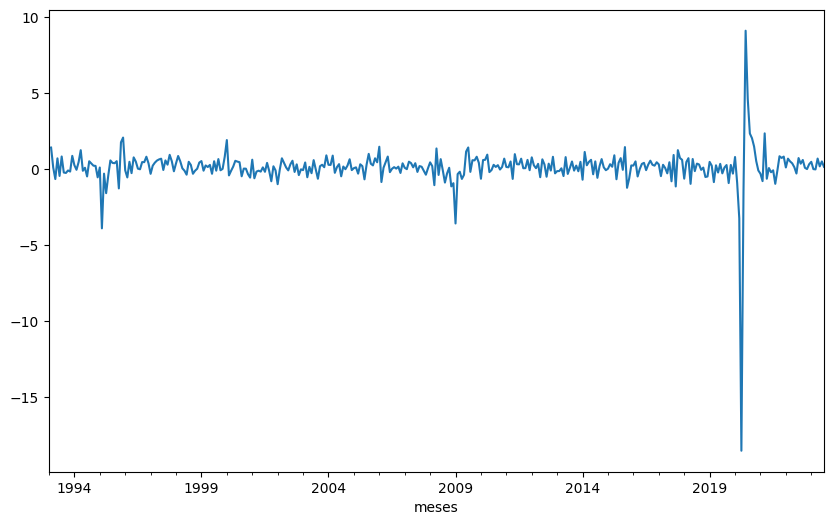

In [20]:
igae_sa['igae_diff'].plot()

In [21]:
#Ya parece estacionaria, pero hay que corroborar con la dickey-fuller test
#Hay que hacer que ignore el primer missing value para que no nos de error
df_test1 = adfuller(igae_sa['igae_diff'].dropna())
pvalue1 = df_test1[1]
pvalue1.round(5)

0.0

In [22]:
#Ya que el pvalor menor a un alpha de 0.05, se rechaza H0, por lo que si es estacionaria


Rechazamos H0, significa que las primeras diferencias del igae son estacionarias.

IGAE I(1)

Primeras diferencias I(0)

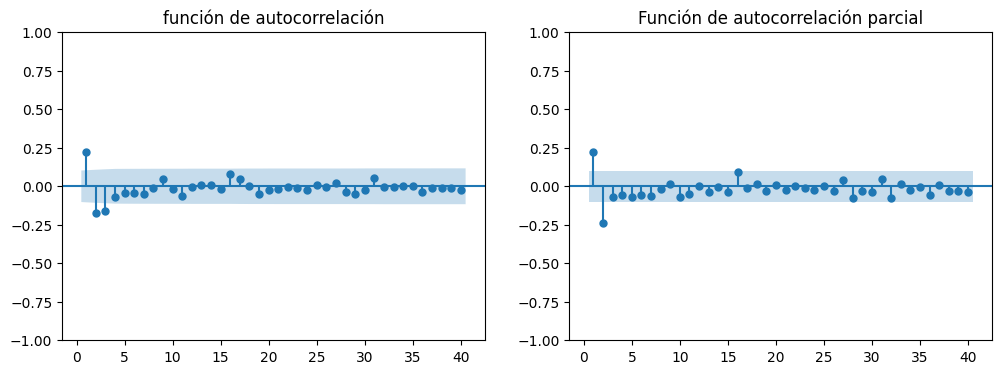

In [23]:
#Graficas de autocorrelación y autocorrelación parcial para verificar que tipo de proceso estocástico estacionario es
#ax son las subgraficas
ig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[0],title='función de autocorrelación')
ax[0].set_ylim(-1,1)


plot_pacf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[1], title='Función de autocorrelación parcial')
ax[1].set_ylim(-1,1)

plt.show()

El area sombreada de la grafica es un intervalo de confianza del 95%, y los puntos dentro de ese intrvalo, estadísticamente son cero.


In [24]:
#Como no sabemos a q gráfica se parece y por lo tant, tampoco sabemos a que modelo se parece, vamos a ejecutar un modelo de prueba

#modelo_prueba = ARIMA (igae_sa['igae_diff'].dropna() ,order=(p,I(d),q) )
#Verificar modelo AR(1)
modelo_prueba = ARIMA (igae_sa['igae_diff'].dropna() ,order=(1,1,0)) 
resultado = modelo_prueba.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -679.632
Date:                Wed, 18 Oct 2023   AIC                           1363.265
Time:                        14:28:52   BIC                           1371.065
Sample:                    02-01-1993   HQIC                          1366.365
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2427      0.008    -32.060      0.000      -0.258      -0.228
sigma2         2.4253      0.032     75.573      0.000       2.362       2.488
Ljung-Box (L1) (Q):                   2.58   Jarque-

Este es el modelo de prueba AR(1)
$$ Y_t = 0.2219 Y_{t-1} + \varepsilon_t $$ 

In [25]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae_sa['igae_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
ic.sort_values('AIC')

AIC          BIC
AR MA                          
3  1   1183.372566  1206.788366
1  4   1184.843160  1212.161593
3  2   1184.880297  1212.198730
4  1   1185.021103  1212.339536
1  5   1186.229362  1217.450429
   2   1186.316694  1205.829861
2  4   1186.638622  1217.859688
3  3   1186.730845  1217.951912
5  1   1186.855985  1218.077052
4  2   1187.146824  1218.367891
1  3   1187.415090  1210.830890
2  2   1187.655051  1211.070851
1  6   1187.912552  1223.036252
6  1   1188.297784  1223.421484
3  6   1188.305905  1231.234872
4  3   1188.608436  1223.732136
2  1   1188.692731  1208.205898
   5   1188.781269  1223.904969
5  2   1189.014715  1224.138415
2  3   1189.183880  1216.502314
0  4   1189.375837  1212.791637
   3   1189.688976  1209.202143
2  6   1189.991402  1229.017735
0  5   1190.171591  1217.490024
5  3   1190.574029  1229.600362
6  2   1190.722022  1229.748356
3  5   1190.724978  1229.751311
2  0   1191.378555  1206.989088
5  4   1191.421166  1234.350133
4  6   1191.704263  1238.535863
3  0   1191.708073  1211.221239
0  6   1191.716873  1222.937940
5  6   1192.105717  1242.839950
6  3   1192.260713  1235.189679
3  4   1192.471324  1227.595024
4  0   1192.619318  1216.035118
5  0   1192.862955  1220.181389
6  4   1193.305266  1240.136866
   0   1193.741006  1224.962073
   6   1194.505973  1249.142839
5  5   1194.566204  1241.397804
4  5   1195.132972  1238.061938
   4   1195.645805  1234.672139
0  2   1198.260034  1213.870567
6  5   1199.988883  1250.723116
1  1   1200.876150  1216.486683
0  1   1200.924033  1212.631933
1  0   1210.529688  1222.237588
0  0   1227.009237  1234.814504

* primeras diferencias ARIMA (3,0,1) = ARMA (3,1)

* igae deses ARIMA (3,1,1)

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} - \theta
\varepsilon_{t-1} + \varepsilon_t $$

In [27]:
#Estimar modelo
#igae ARIMA(3,1,1)
arima_model = ARIMA(igae_sa['IGAE_DESES'], order=(3,1,1))
results = arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             IGAE_DESES   No. Observations:                  367
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -591.604
Date:                Wed, 18 Oct 2023   AIC                           1193.208
Time:                        14:32:32   BIC                           1212.721
Sample:                    01-01-1993   HQIC                          1200.962
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0175      0.232      4.384      0.000       0.563       1.472
ar.L2         -0.4222      0.072     -5.876      0.000      -0.563      -0.281
ar.L3          0.1048      0.089      1.176      0.2

In [28]:
#Pronosticar comportamiento pasado
igae_sa['m_arima'] = results.predict()

In [29]:
igae_sa.head()

,IGAE_DESES,igae_diff,m_arima
meses,,,
1993-01-01,56.282290,NaN,0.000000
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


In [31]:
#Sustituir posición 0 de m_arima por el primer valor de igae_deses
igae_sa['m_arima'][0] = igae_sa['IGAE_DESES'][0]

In [32]:
igae_sa.head()

,IGAE_DESES,igae_diff,m_arima
meses,,,
1993-01-01,56.282290,NaN,56.282290
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


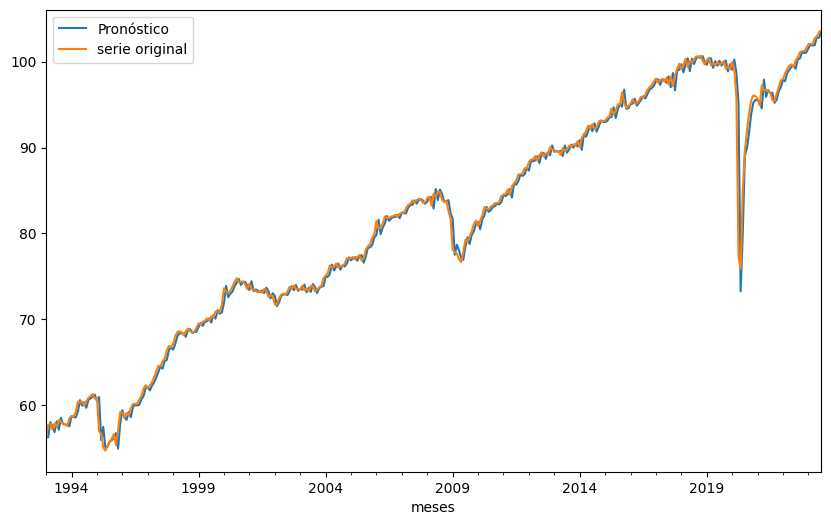

In [36]:
#Graaficar
igae_sa['m_arima'].plot(label = 'Pronóstico')
igae_sa['IGAE_DESES'].plot(label='serie original')
plt.legend()

El modelo arima estimado logra reproduir la evolución pasada de la serie, por lo que este modelo puede ser útil para pronosticar.

(612.0, 646.0)

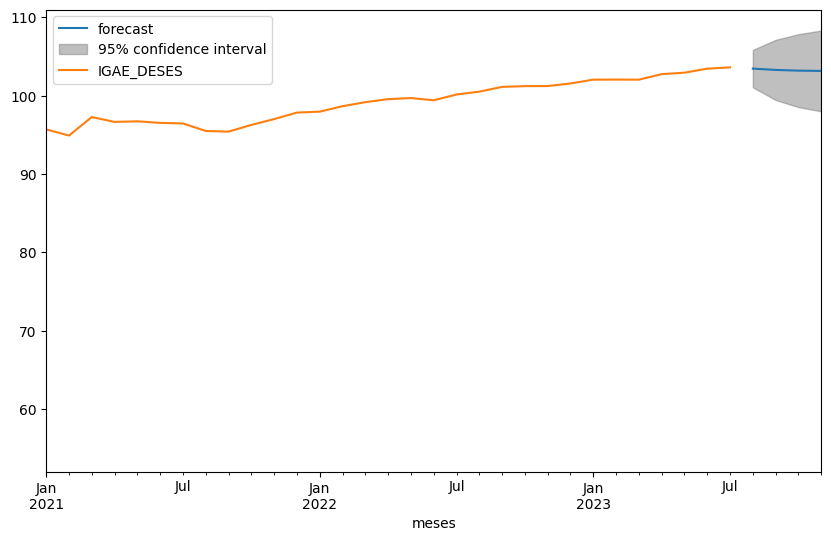

In [42]:
#Ya que hay que predecir el futuro, la feha de inicio debe ser la última fecha que nosotros tenemos disponible
#Ya que desde esa fecha, empieza el futuro que predeciremos
plot_predict(results, start='2023-08-01' , end='2023-11-01' )
igae_sa['IGAE_DESES'].plot()
plt.legend()
plt.xlim('2021-01-01','2023-11-01')


In [39]:
igae_sa.tail(1)

,IGAE_DESES,igae_diff,m_arima
meses,,,
2023-07-01,103.596612,0.158524,103.442199


In [44]:
results.predict(start='2023-08-01' , end='2023-11-01' )

2023-08-01    103.443848
2023-09-01    103.275282
2023-10-01    103.184865
2023-11-01    103.148016
Freq: MS, Name: predicted_mean, dtype: float64

En general, los modelos ARIMA son modelos a corto plazo, no pueden pronosticar muy  a futuro. Cada pronostico, entre más a futuro le pedimos un pronóstico el intervalo de confianza (el área sombreada) se vuelve mas grande \.

En general, si es un ARIMA(3,1,1) se considera que el modelo ponostica con bastante presicion 3 periodos, si es un ARIMA(2,1,3) pronostica 3 peridos, ARIMA (2,1,4) pronostica 4 periodos